# Landing Page A/B Testing

## A/B Testing Process

1. Understanding business problem & data
2.Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)
3. Look summary stats and plots
4. Apply hypothesis testing and check assumptions
5. Check Normality & Homogeneity
6. Apply tests (Shapiro, Levene Test, T-Test, Welch Test, Mann Whitney U Test)
7. Evaluate the results
8. Make inferences

# 📚 1. Import Libraries

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')

# Hypothesis Testing
from scipy.stats import shapiro, mannwhitneyu
import scipy.stats as stats

# 📖 2. Load Data

In [2]:
raw_data = pd.read_csv('./Data/web_page_data.csv')
print(f'The dataset has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns')

The dataset has 36 rows and 2 columns


In [3]:
# Creating a copy of the dataframe in case we need the raw data in the next sections
df = raw_data.copy()

## 2.1. Data Overview

In [4]:
df.head()

,Page,Time
0,Page A,0.2100
1,Page B,2.5300
2,Page A,0.3500
3,Page B,0.7100
4,Page A,0.6700


In [5]:
df.tail()

,Page,Time
31,Page A,0.7400
32,Page A,0.8600
33,Page A,1.1800
34,Page A,2.0600
35,Page A,0.9300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Page    36 non-null     object 
 1   Time    36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


# ✅ 3. Sanity Check

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1. Checking for Missing Values

In [7]:
count = df.isnull().sum()[df.isnull().sum() > 0]
percentage = (count / df.shape[0]) * 100

print(count.shape[0], 'columns has missing values')
print('-'*50)
print(pd.DataFrame({'Count':count, 'Percentage %':percentage}))

0 columns has missing values
--------------------------------------------------
Empty DataFrame
Columns: [Count, Percentage %]
Index: []


In [8]:
# Checking some random records to see if there is any value which could replace null and may be missed by the above function.
df.sample(20, random_state=101)

,Page,Time
18,Page A,0.4500
7,Page B,2.4600
20,Page A,1.1800
32,Page A,0.8600
30,Page A,1.7300
26,Page A,0.3900
25,Page B,2.2300
27,Page B,0.4300
33,Page A,1.1800
2,Page A,0.3500


## 3.2. Checking for Duplicates

In [9]:
df.duplicated().sum()

1

🔎 **Observations:** Eventhoug it seems like the dataset has 1 duplicated value, we prefer to keep it as it might be an actual value as the data set has only 2 columns and 36 rows.

## 3.3. Checking for Data Type

In [10]:
df.dtypes

Page     object
Time    float64
dtype: object

## 3.4. Checking the number of unique values of each column

In [11]:
df.nunique()

Page     2
Time    34
dtype: int64

## 3.5. Summary Statistics

In [12]:
df.describe()

,Time
count,36.0000
mean,1.4119
std,0.9424
min,0.2100
25%,0.7025
50%,1.1800
75%,1.9925
max,3.5700


🔎 **Observations:** 
- Max number of seconds spent in the landing pages is 357.
- Min number of seconds spent in the landing pages is 21.
- People spend 141 seconds in average in both landing pages.

In [13]:
df.groupby(by='Page').describe()

Time                                                 
         count   mean    std    min    25%    50%    75%    max
Page                                                           
Page A 21.0000 1.2633 0.8846 0.2100 0.6700 0.9500 1.7300 3.4200
Page B 15.0000 1.6200 1.0114 0.4300 0.8000 1.4700 2.3450 3.5700

🔎 **Observations:** 

- Max number of seconds spent in Page A is 342 and in Page B is 357 with average of 126.
- Min number of seconds spent in Page A is 21 and in Page B is 43 with average of 162.
- It looks like people spend more time on Page B.

# 📊 4. Exploratory Data Analysis (EDA) and Visualization

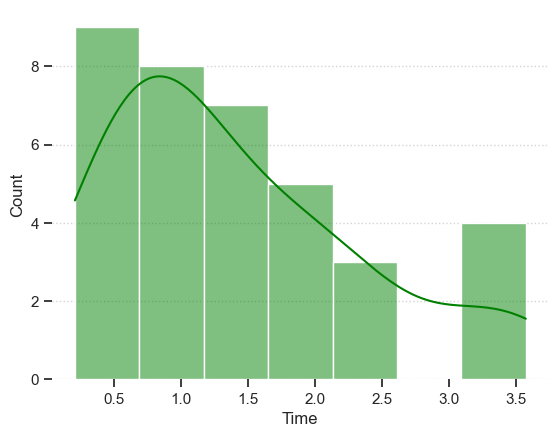

In [26]:
sb.histplot(data=df, x='Time', kde=True, color='green')
# ---Remove the bars around the graph----
plt.box(False)
# -------------Add a grid-------------
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

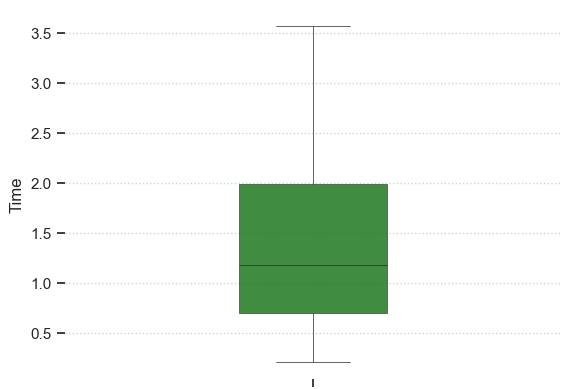

In [29]:
sb.boxplot(data=df, y='Time', color='green', 
            boxprops=dict(alpha=0.80), linewidth=0.50, width=0.30)
# ---Remove the bars around the graph----
plt.box(False)
# -------------Add a grid-------------
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

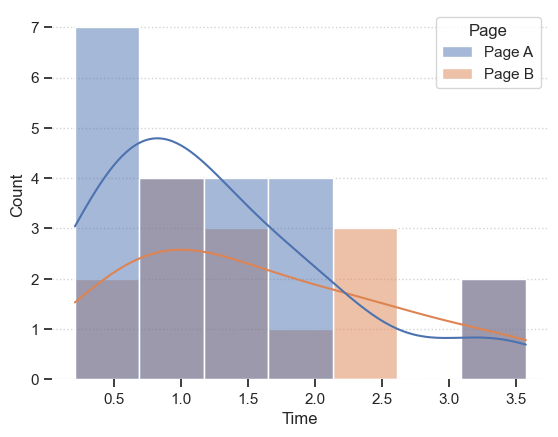

In [46]:
sb.histplot(data=df, x='Time', kde=True, hue='Page')
# ---Remove the bars around the graph----
plt.box(False)
# -------------Add a grid-------------
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

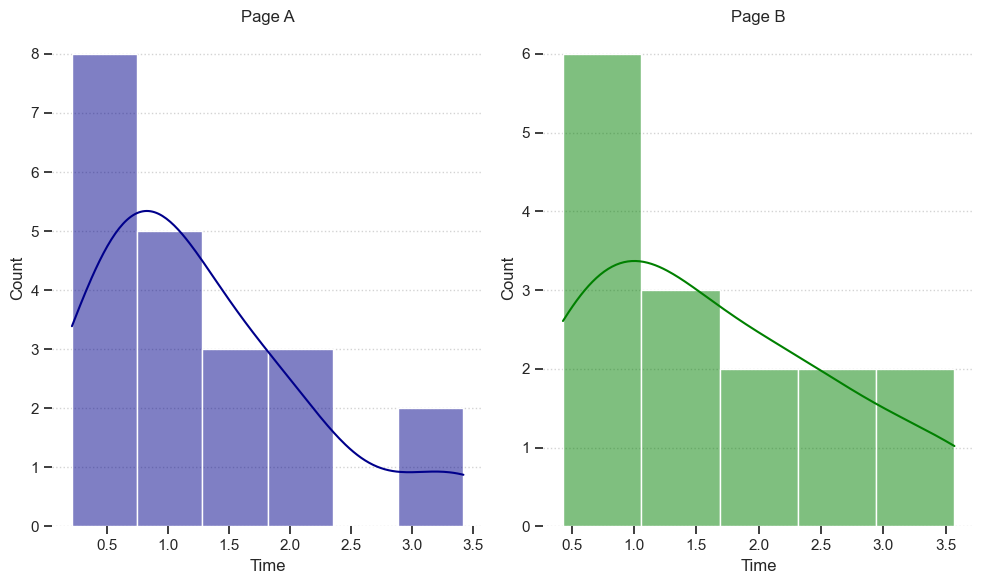

In [37]:
# Let's put them into separate figures to make a better observation

# Create figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Flatten the axes array for easier indexing
axes = axes.flatten()
sb.histplot(data=df[df['Page'] == 'Page A'], x='Time', kde=True, ax=axes[0], color='darkblue')
axes[0].set(title='Page A')
sb.histplot(data=df[df['Page'] == 'Page B'], x='Time', kde=True, ax=axes[1], color='green')
axes[1].set(title='Page B')

# Remove borders and add grids for each subplot
for ax in axes:
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Add grid
    ax.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)


plt.tight_layout()
plt.show()

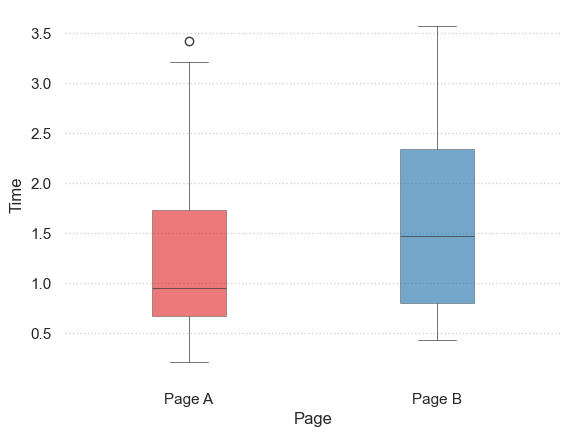

In [47]:
sb.boxplot(data=df, x='Page', y='Time', palette=["#FF0000", "#0070C0"],
           boxprops=dict(alpha=0.60), linewidth=0.50, width=0.30)
# ---Remove the bars around the graph----
plt.box(False)
# ----Remove ticks on x and y axes----
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=False, right=False)
# -------------Add a grid-------------
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', which='major', alpha=0.85, linestyle='dotted', zorder=2)
plt.show()

# 5. A/B Testing

## 5.1. Testing Normality

$H_0$ : There is **no** statistically significant difference between sample distribution and normal distribution.

$H_1$ : There is **a** statistically significant difference between sample distribution and normal distribution.

We'll use [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

Depending on the result of the test we'll continue with Parametric or Non-parametric Method

$p < 0.05 => \text{Reject }H_0$

In [48]:
# Split A/B
page_a = df[df['Page'] == 'Page A']['Time']
page_b = df[df['Page'] == 'Page B']['Time']

# Set the significance level 
alpha = 0.05

# Assumption: Normality
p_value_a = shapiro(page_a)[1]
print(f'Page A p_value {p_value_a} and result {p_value_a < alpha}')
p_value_b = shapiro(page_b)[1]
print(f'Page B p_value {p_value_b} and result {p_value_b < alpha}')

Page A p_value 0.01751495711505413 and result True
Page B p_value 0.1611931324005127 and result False


🔎 **Observations:** Since at least one of the groups does not follow a normal distribution, non-parametric tests are more appropriate. These tests do not assume normality. That's why we'll run [Mann–Whitney $U$ test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) as a next step.

## 5.2. Non-parametric Method

Is there a significant difference in ranks of Page A and Page B?

$H_0$ : The distribution of the values of the two groups **are** equal.

$H_1$ : The distribution of the values of the two groups are **not** equal.


In [49]:
stat, p_value = mannwhitneyu(page_a, page_b)

print('Mann-Whitney U test statistic:', stat)
print('P-value:', p_value)

# Interpret the results
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between the two groups of pages.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between the two groups of pages.')

Mann-Whitney U test statistic: 119.5
P-value: 0.22880908661199295
Fail to reject the null hypothesis: There is no significant difference between the two groups of pages.


🔎 **Observations:** Small sample sizes reduce the power of statistical tests, meaning there's a higher chance of Type II errors (failing to detect a difference when one exists). That's why we'll check [effect sizes](https://en.wikipedia.org/wiki/Effect_size) which provide information on the magnitude of the difference between groups, which can be more informative than p-values alone.

$$d = \frac{\bar{x}_1 - \bar{x}_2}{s}$$

Here’s a general interpretation guideline for Cohen's d:
- 0.2: Small effect
- 0.5: Medium effect
- 0.8: Large effect

In [50]:
def compute_cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

effect_size = compute_cohens_d(page_a, page_b)
print('Effect Size (Cohen\'s d):', effect_size)

Effect Size (Cohen's d): -0.3798813594950333


🔎 **Observations:** An effect size of -0.37 suggests a small to medium effect. The negative sign indicates the direction of the effect, meaning that the second group (Page B) has lower values compared to the first group (Page A).

# 📝 6. Results

In our analysis, the Mann-Whitney U test yielded a p-value of 0.22, indicating no statistically significant difference between the groups. However, the effect size (Cohen's d) was -0.37, suggesting a small to medium practical difference in outcomes between the two groups. Further investigation with a larger sample size may be warranted to explore this trend.